Nama : Adinda Rizka Hamdasati

NIM : 24060122140139

Lab C1 ML - Modul 5

1. Agglomerative Clustering dengan Single Linkage dan Average Linkage pada Dataset Random

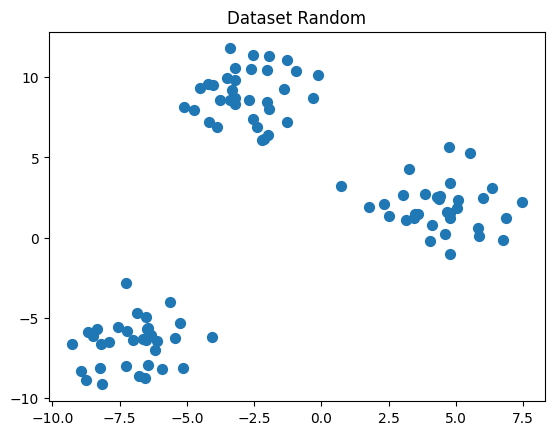

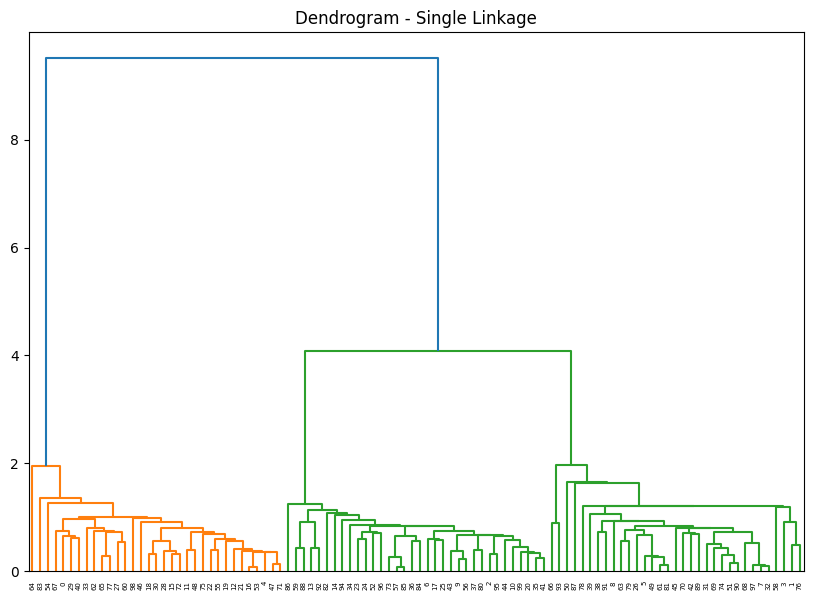

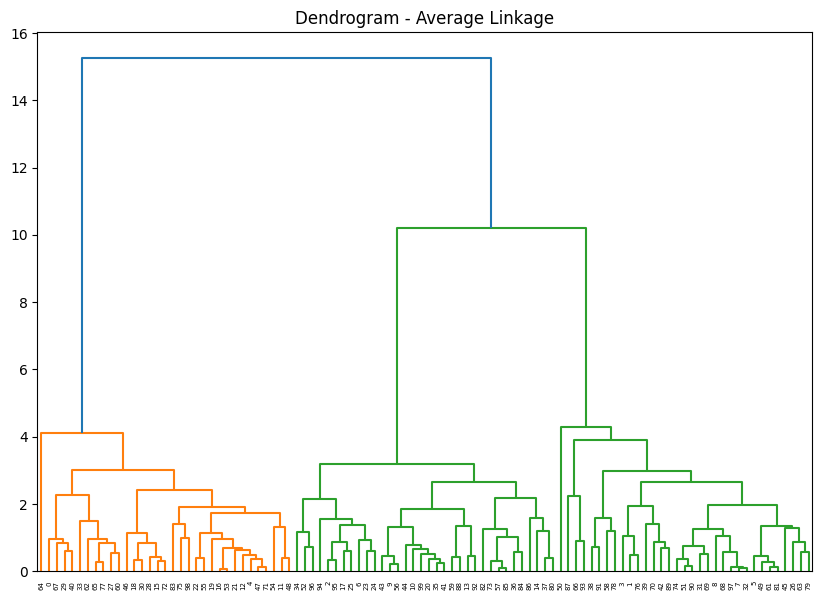

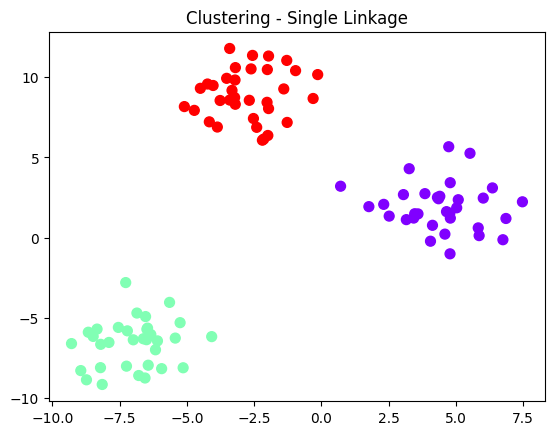

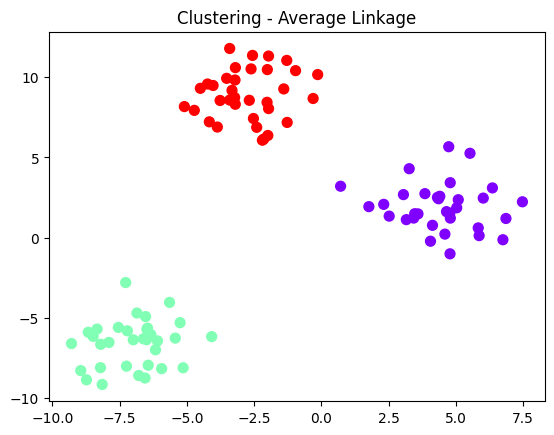

In [9]:
# Import pustaka yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Membuat dataset random
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Menampilkan dataset random
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dataset Random")
plt.show()

# Menggunakan single linkage
linkage_single = linkage(X, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linkage_single)
plt.title("Dendrogram - Single Linkage")
plt.show()

# Menggunakan average linkage
linkage_average = linkage(X, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linkage_average)
plt.title("Dendrogram - Average Linkage")
plt.show()

# Clustering dengan scikit-learn menggunakan single linkage
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
model_average = AgglomerativeClustering(n_clusters=3, linkage='average')

# Melakukan prediksi cluster
labels_single = model_single.fit_predict(X)
labels_average = model_average.fit_predict(X)

# Menampilkan hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_single, cmap='rainbow', s=50)
plt.title("Clustering - Single Linkage")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=labels_average, cmap='rainbow', s=50)
plt.title("Clustering - Average Linkage")
plt.show()

Penjelasan :

Kode ini menganalisis Agglomerative Clustering menggunakan metode single linkage dan average linkage pada dataset random yang dihasilkan secara sintetis. Dataset dibuat dengan fungsi make_blobs dari pustaka sklearn, yang menghasilkan 100 sampel data yang terdistribusi dalam 3 kluster dengan penyebaran tertentu. Dataset divisualisasikan menggunakan scatter plot untuk melihat distribusi awal data.

Langkah pertama adalah membuat dendrogram menggunakan metode single linkage, yang menggabungkan kluster berdasarkan jarak terdekat antar titik. Visualisasi dendrogram menunjukkan proses penggabungan kluster secara hierarkis, dimulai dari kluster kecil hingga terbentuk satu kluster besar. Langkah serupa dilakukan untuk metode average linkage, yang menggabungkan kluster berdasarkan rata-rata jarak antar semua titik dalam dua kluster. Dendrogram average linkage menunjukkan pola penggabungan yang lebih seimbang dibandingkan single linkage.

Clustering dilakukan dengan AgglomerativeClustering dari pustaka scikit-learn untuk kedua metode. Data dikelompokkan menjadi tiga kluster, dan hasilnya divisualisasikan dengan scatter plot. Pada metode single linkage, hasil clustering cenderung menghasilkan kluster yang memanjang karena sensitivitasnya terhadap jarak terdekat. Sebaliknya, metode average linkage menghasilkan kluster yang lebih seimbang dan kompak, karena mempertimbangkan rata-rata jarak antar titik.

Secara keseluruhan, kode ini memberikan gambaran tentang perbedaan hasil clustering antara single linkage dan average linkage. Single linkage menghasilkan kluster yang lebih sensitif terhadap outlier, sedangkan average linkage memberikan hasil yang lebih stabil dan seimbang. Visualisasi dendrogram dan scatter plot membantu memahami pola pengelompokan data untuk kedua metode.

2. Agglomerative Clustering pada Dataset cars_clus.csv

Dimensi dataset setelah pembersihan: (153, 16)


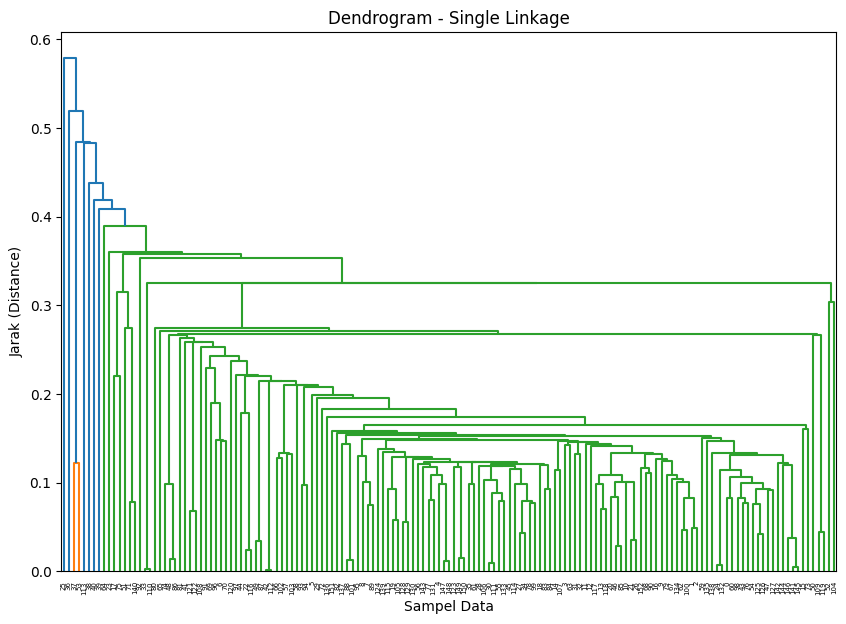

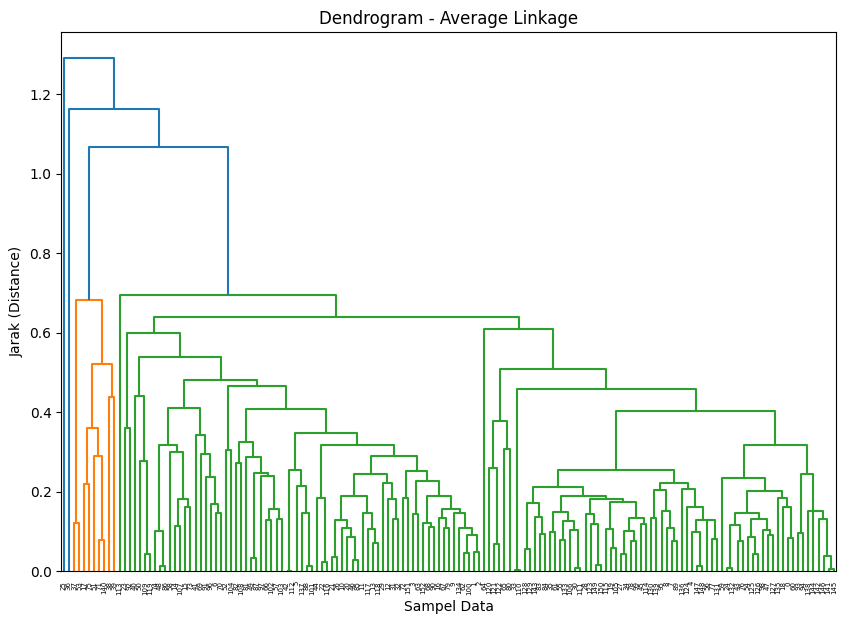

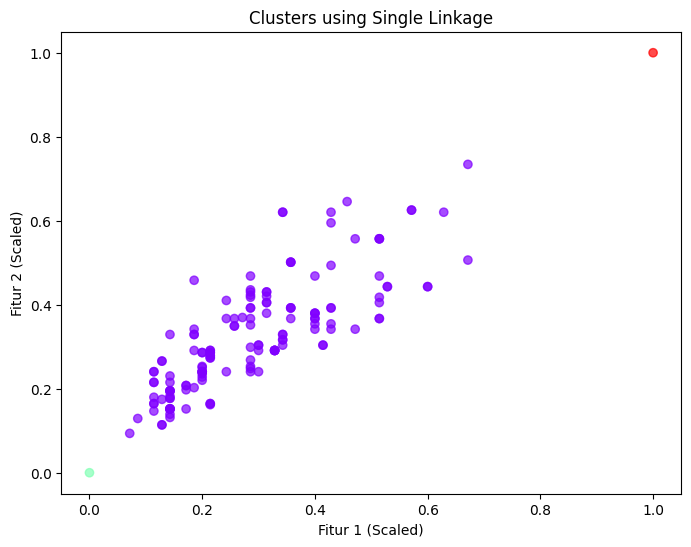

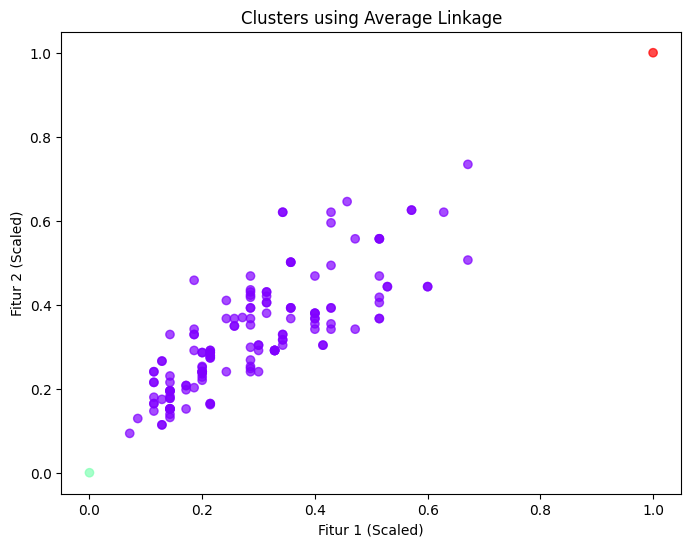


Perbedaan antara Single Linkage dan Average Linkage:
1. Single Linkage:
- Menggabungkan kluster berdasarkan jarak terdekat antar titik.
- Cenderung menghasilkan kluster memanjang.
- Sensitif terhadap outlier.

2. Average Linkage:
- Menggabungkan kluster berdasarkan rata-rata jarak antar titik.
- Menghasilkan kluster yang lebih seimbang dan kompak.
- Kurang sensitif terhadap outlier.


In [5]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Memuat dataset
filename = 'cars_clus.csv'  # Pastikan path file sudah sesuai
data = pd.read_csv(filename)

# Membersihkan data
# Mengubah kolom numerik ke tipe float dan menghapus baris dengan nilai NaN
numeric_columns = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data_cleaned = data.dropna().reset_index(drop=True)

# Menampilkan dimensi dataset setelah pembersihan
print(f"Dimensi dataset setelah pembersihan: {data_cleaned.shape}")

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_cleaned[numeric_columns])

# 1. Membuat Dendrogram dengan Metode Single Linkage
Z_single = linkage(X_scaled, method='single')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - Single Linkage")
dendrogram(Z_single)
plt.xlabel("Sampel Data")
plt.ylabel("Jarak (Distance)")
plt.show()

# 2. Membuat Dendrogram dengan Metode Average Linkage
Z_average = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - Average Linkage")
dendrogram(Z_average)
plt.xlabel("Sampel Data")
plt.ylabel("Jarak (Distance)")
plt.show()

# 3. Clustering dengan Scikit-learn (Single Linkage)
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = model_single.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_single, cmap='rainbow', alpha=0.7)
plt.title("Clusters using Single Linkage")
plt.xlabel("Fitur 1 (Scaled)")
plt.ylabel("Fitur 2 (Scaled)")
plt.show()

# 4. Clustering dengan Scikit-learn (Average Linkage)
model_average = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_average = model_average.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_average, cmap='rainbow', alpha=0.7)
plt.title("Clusters using Average Linkage")
plt.xlabel("Fitur 1 (Scaled)")
plt.ylabel("Fitur 2 (Scaled)")
plt.show()

# Perbandingan Hasil Clustering
print("\nPerbedaan antara Single Linkage dan Average Linkage:")
print("1. Single Linkage:")
print("- Menggabungkan kluster berdasarkan jarak terdekat antar titik.")
print("- Cenderung menghasilkan kluster memanjang.")
print("- Sensitif terhadap outlier.")
print("\n2. Average Linkage:")
print("- Menggabungkan kluster berdasarkan rata-rata jarak antar titik.")
print("- Menghasilkan kluster yang lebih seimbang dan kompak.")
print("- Kurang sensitif terhadap outlier.")

Penjelasan :

Kode ini melakukan analisis agglomerative clustering pada dataset cars_clus.csv. Dataset dimuat menggunakan pandas dan dibersihkan dengan mengubah kolom numerik menjadi tipe data float. Baris yang mengandung nilai kosong (NaN) dihapus untuk memastikan hanya data valid yang dianalisis. Setelah itu, data dinormalisasi menggunakan MinMaxScaler, yang penting untuk menyamakan skala antar fitur sehingga perhitungan jarak dalam clustering menjadi lebih akurat.

Dendrogram dibuat untuk dua metode linkage, yaitu single linkage dan average linkage. Single linkage menggabungkan kluster berdasarkan jarak terdekat antar titik, sementara average linkage menggunakan rata-rata jarak antar semua pasangan titik dari dua kluster. Dendrogram menunjukkan proses penggabungan kluster secara hierarkis hingga terbentuk satu kluster besar, memberikan wawasan visual tentang pola pengelompokan data.

Proses clustering dilanjutkan dengan menggunakan AgglomerativeClustering dari scikit-learn. Data dikelompokkan menjadi tiga kluster (n_clusters=3) untuk setiap metode linkage. Scatter plot dibuat untuk memvisualisasikan hasil clustering, di mana pola kluster yang dihasilkan oleh single linkage cenderung memanjang dan tidak kompak, sedangkan average linkage menghasilkan kluster yang lebih seimbang dan kompak.

Perbandingan antara kedua metode dijelaskan secara eksplisit. Single linkage sensitif terhadap outlier karena hanya mempertimbangkan jarak terdekat, sementara average linkage lebih stabil karena menggunakan rata-rata jarak. Analisis ini memberikan gambaran lengkap tentang perbedaan pola pengelompokan antara kedua metode linkage. Kode ini mencakup semua langkah penting untuk menjawab soal nomor 2 dengan detail dan jelas.

3. Agglomerative Clustering untuk Dataset Iris

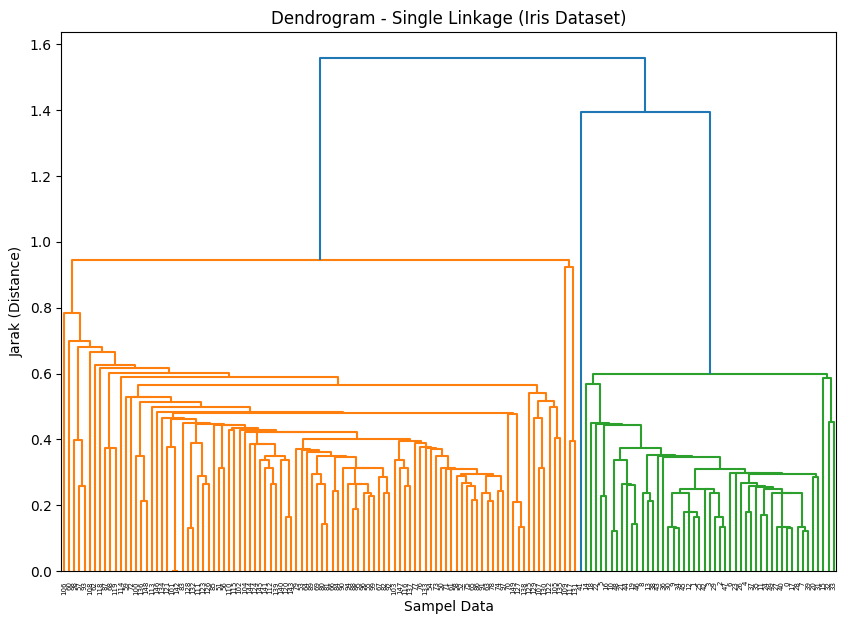

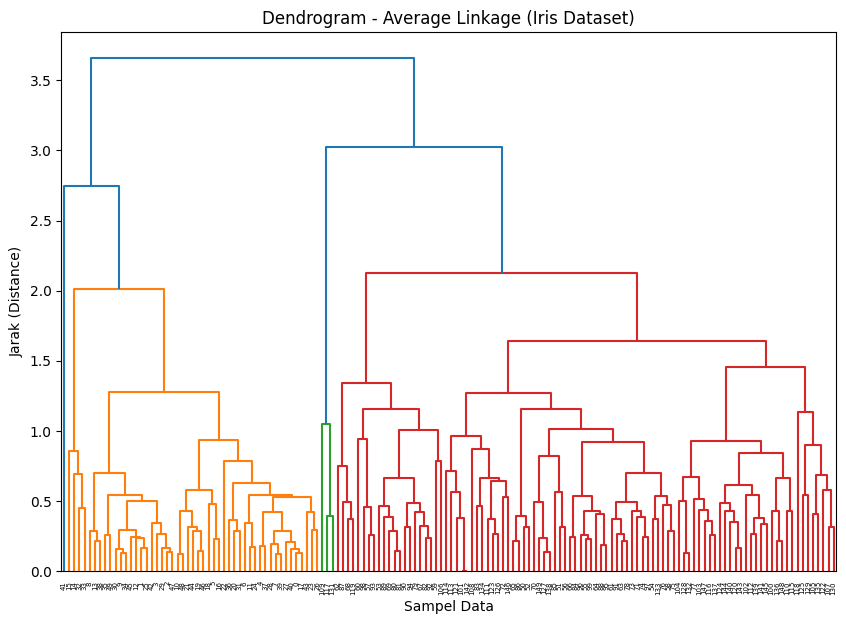

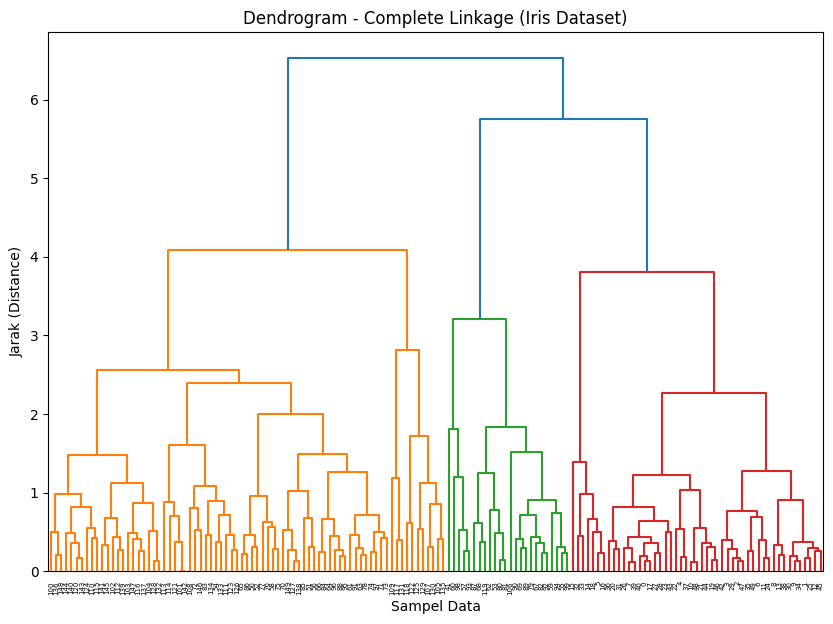

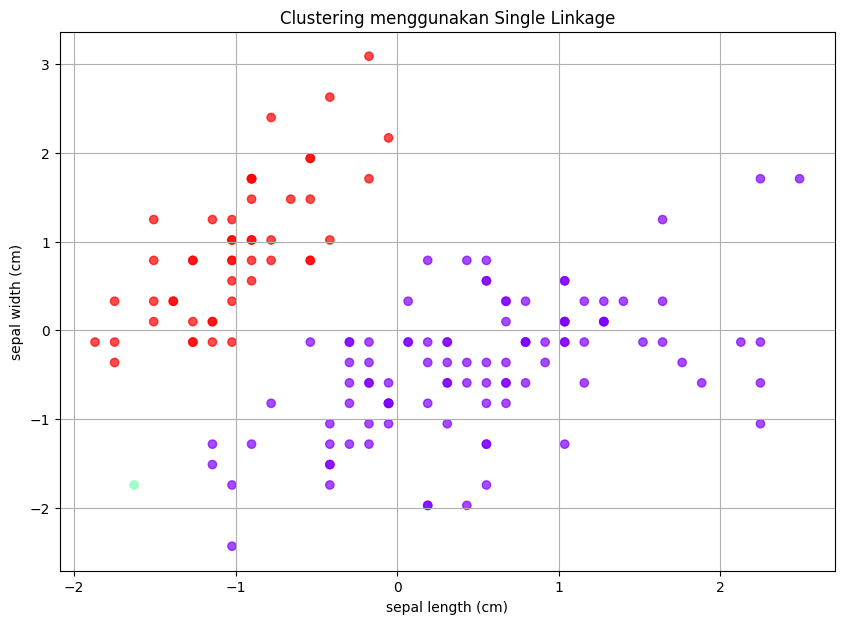

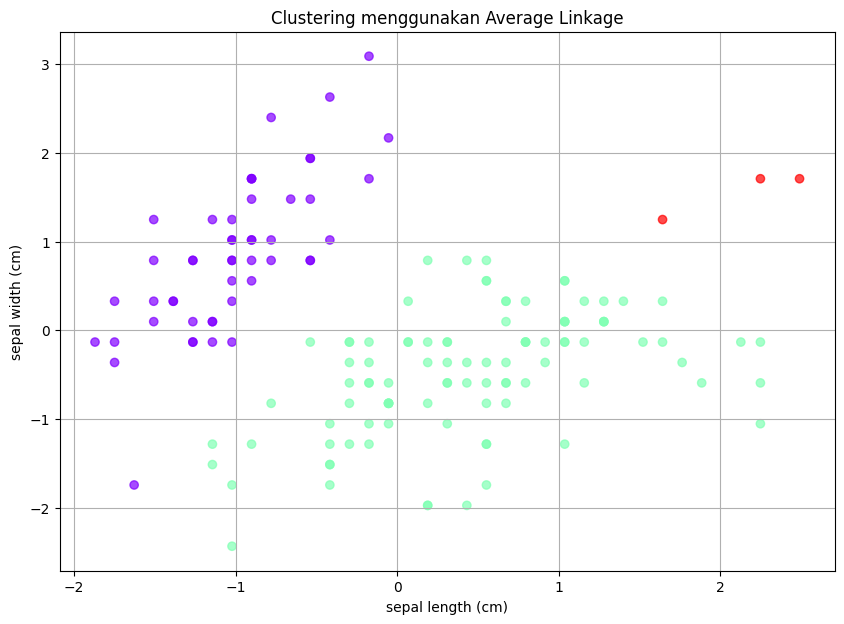

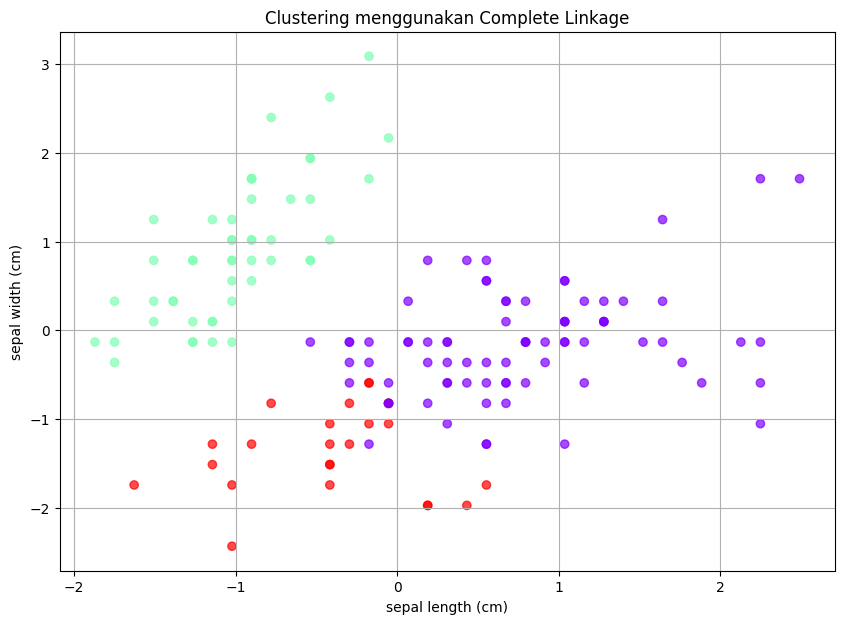

Perbandingan Hasil Clustering:
- Single linkage cenderung membentuk kluster memanjang dan sensitif terhadap outlier.
- Average linkage menghasilkan kluster yang lebih seimbang karena mempertimbangkan rata-rata jarak.
- Complete linkage membentuk kluster yang lebih kompak dengan meminimalkan jarak terjauh antar titik.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Memuat dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Membuat Dendrogram untuk Metode Single, Average, dan Complete Linkage
for method in ['single', 'average', 'complete']:
    plt.figure(figsize=(10, 7))
    Z = linkage(X_scaled, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram - {method.capitalize()} Linkage (Iris Dataset)")
    plt.xlabel("Sampel Data")
    plt.ylabel("Jarak (Distance)")
    plt.show()

# 2. Clustering dengan AgglomerativeClustering untuk Single, Average, dan Complete Linkage
for linkage_method in ['single', 'average', 'complete']:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels = clustering.fit_predict(X_scaled)

    # Visualisasi hasil clustering menggunakan scatter plot
    plt.figure(figsize=(10, 7))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', alpha=0.7)
    plt.title(f"Clustering menggunakan {linkage_method.capitalize()} Linkage")
    plt.xlabel(feature_names[0])  # Sepal length
    plt.ylabel(feature_names[1])  # Sepal width
    plt.grid()
    plt.show()

# Perbandingan antara Metode Single, Average, dan Complete
print("Perbandingan Hasil Clustering:")
print("- Single linkage cenderung membentuk kluster memanjang dan sensitif terhadap outlier.")
print("- Average linkage menghasilkan kluster yang lebih seimbang karena mempertimbangkan rata-rata jarak.")
print("- Complete linkage membentuk kluster yang lebih kompak dengan meminimalkan jarak terjauh antar titik.")

Penjelasan :  
1. Memuat Dataset Iris
Dataset Iris dimuat menggunakan pustaka load_iris dari sklearn. Dataset ini berisi empat fitur utama: sepal length, sepal width, petal length, dan petal width, serta label target yang menunjukkan tiga spesies bunga (Setosa, Versicolor, dan Virginica). Label target tidak digunakan dalam analisis karena clustering adalah metode unsupervised.

2. Standarisasi Data
Data distandarisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki rata-rata 0 dan varians 1. Proses ini penting agar skala fitur tidak memengaruhi hasil clustering, terutama karena beberapa fitur mungkin memiliki rentang nilai yang berbeda.

3. Membuat Dendrogram
Dendrogram dibuat menggunakan fungsi linkage dari pustaka scipy untuk tiga metode linkage: single, average, dan complete.

	•	Single linkage mengelompokkan kluster berdasarkan jarak terdekat antar titik.

	•	Average linkage menggunakan rata-rata jarak antar titik dalam dua kluster.
  
	•	Complete linkage mengelompokkan kluster berdasarkan jarak terjauh antar titik.
Visualisasi dendrogram membantu memahami hierarki penggabungan kluster, mulai dari data individual hingga terbentuk satu kluster besar.
4. Clustering dengan Agglomerative Clustering
Clustering dilakukan menggunakan Agglomerative Clustering dari pustaka scikit-learn. Kluster dibentuk untuk tiga metode linkage (single, average, complete), masing-masing menghasilkan tiga kluster. Hasil clustering divisualisasikan menggunakan scatter plot untuk menunjukkan pola kluster berdasarkan dua fitur pertama (sepal length dan sepal width).
5. Visualisasi Hasil Clustering
Scatter plot dibuat untuk setiap metode linkage, menggunakan dua fitur pertama sebagai sumbu X dan Y. Plot ini menunjukkan bagaimana data dikelompokkan ke dalam kluster berdasarkan metode linkage yang digunakan.
6. Analisis Perbedaan Antar Metode
Perbedaan hasil clustering dijelaskan:

	•	Single linkage cenderung membentuk kluster memanjang karena penggabungan kluster didasarkan pada jarak terdekat.

	•	Average linkage menghasilkan kluster yang lebih seimbang karena mempertimbangkan rata-rata jarak antar titik.

	•	Complete linkage membentuk kluster yang lebih kompak dengan meminimalkan jarak terjauh antar titik.